In [362]:
#importing librarier
import matplotlib.pyplot as plt
import numpy as np
import math


In [363]:
#defining sigmoid function and its derivative
def sigmoid (x):
    return 1/(1+np.exp(-x))

def sigmoid_der (x):
    return sigmoid(x)*(1-sigmoid(x))

#mean , standard deviation for noise
mean=0
std=0.05

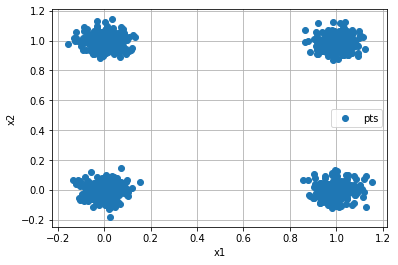

epoch: 1
Training error 0.17795947717748162
Testing error 0.16696335133224657
epoch: 2
Training error 0.11027113296073282
Testing error 0.10115377937528282
epoch: 3
Training error 0.08059288218898203
Testing error 0.07296860931987081
epoch: 4
Training error 0.06761135178072215
Testing error 0.06063467657005949
epoch: 5
Training error 0.06081538420004575
Testing error 0.05414652794536854
epoch: 6
Training error 0.05613005341981639
Testing error 0.049645309591028225
epoch: 7
Training error 0.052224124928185706
Testing error 0.045877805311466416
epoch: 8
Training error 0.04873257643916371
Testing error 0.04249173835929449
epoch: 9
Training error 0.04552637154226792
Testing error 0.039355055797531326
epoch: 10
Training error 0.04255046257763513
Testing error 0.0364069543001693
epoch: 11
Training error 0.03978318284212798
Testing error 0.03362081807880001
epoch: 12
Training error 0.03721807285309903
Testing error 0.03098865351970719
epoch: 13
Training error 0.03485223998968417
Testing error

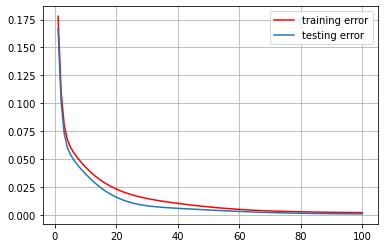

In [373]:
# The follwoing is for AND
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=1000
N=int(0.8*T)
M=int(0.2*T)

y=np.ones(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i]==0 and x2[i]==0:
        y[i]=0
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    
#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()

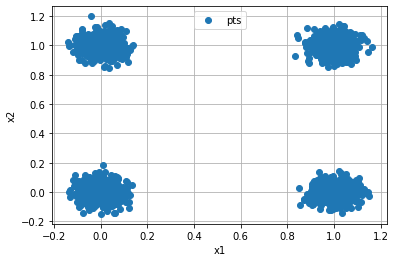

epoch: 1
Training error 0.21770224650590528
Testing error 0.2082721629594561
epoch: 2
Training error 0.19409085315071498
Testing error 0.18509466950492273
epoch: 3
Training error 0.11253369521425287
Testing error 0.10503337017591119
epoch: 4
Training error 0.03602201985179012
Testing error 0.03279561276789166
epoch: 5
Training error 0.016216388334096377
Testing error 0.014807451064713156
epoch: 6
Training error 0.009344744207266423
Testing error 0.008555073173816931
epoch: 7
Training error 0.006249442970537183
Testing error 0.00573147297006914
epoch: 8
Training error 0.004582981789491876
Testing error 0.004209590340640002
epoch: 9
Training error 0.003571327833505518
Testing error 0.0032852491284680973
epoch: 10
Training error 0.002903440986745467
Testing error 0.002674845852193546
epoch: 11
Training error 0.002434713884601207
Testing error 0.0022463817277507273
epoch: 12
Training error 0.0020902022289282928
Testing error 0.0019314080476443406
epoch: 13
Training error 0.0018277028685097

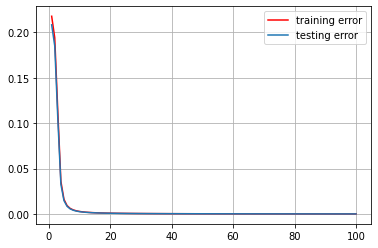

In [374]:
# The follwoing is for AND
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=2500
N=int(0.8*T)
M=int(0.2*T)

y=np.zeros(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i] and x2[i]:
        y[i]=1
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)

#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()

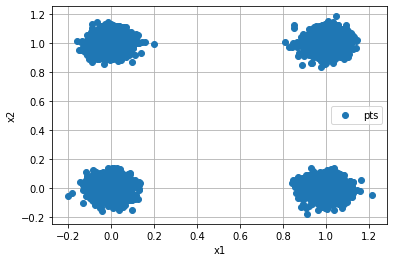

epoch: 1
Training error 0.22144686851690035
Testing error 0.22338936726491068
epoch: 2
Training error 0.14107138084218065
Testing error 0.1414714639859082
epoch: 3
Training error 0.0218752004923784
Testing error 0.022122689371142427
epoch: 4
Training error 0.007708820199022554
Testing error 0.007745992307919961
epoch: 5
Training error 0.004745085406407233
Testing error 0.004770025935239043
epoch: 6
Training error 0.003439945053671028
Testing error 0.003464675529559976
epoch: 7
Training error 0.0027107483282790123
Testing error 0.002737041134262202
epoch: 8
Training error 0.002248084572392634
Testing error 0.0022762437136254992
epoch: 9
Training error 0.0019297732927576932
Testing error 0.001959808490010071
epoch: 10
Training error 0.001698052779989969
Testing error 0.0017299104862583176
epoch: 11
Training error 0.0015221808926416454
Testing error 0.0015557986236756874
epoch: 12
Training error 0.0013843435503156623
Testing error 0.0014196630527726448
epoch: 13
Training error 0.001273531

In [ ]:
# The follwoing is for AND
# number of test cases

#initialisation of weight vectors
alpha=np.random.uniform(-4,4,6)
alpha=alpha.reshape(3,2)
beta=np.array([np.random.uniform(-4,4,3)]).T


# The follwoing is for AND
# number of test cases
T=5000
N=int(0.8*T)
M=int(0.2*T)

y=np.zeros(T)

# each node in input layer is either 0 or 1 (with some noise)
x1=np.random.randint(0,2,T)
x2=np.random.randint(0,2,T)

#converting to float
x1=x1.astype(float)
x2=x2.astype(float)

#if both nodes are 1 then output node should be 1
for i in range(T):
    if x1[i] and x2[i]:
        y[i]=1
        
#adding noise
x1 += np.random.normal(mean, std, T)
x2 += np.random.normal(mean, std, T)

# appending a row of ones, reshaping the matrix
X=np.array([np.ones(T),x1,x2])
X=X.reshape(3,T)


#plotting the input data points
plt.plot(X[1,:],X[2,:],'o',label='pts')
plt.legend()
plt.grid(1)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.show()

#size of mini batch
m=50
#number of epochs
epoch =100
#learning rate
gamma=0.05

#The vector for mse values of training data
R_train=np.empty([1])
#The vector for mse values of testing data
R_test=np.empty([1])

# looping over epoch
for i in range(epoch):
    #looping over the mini batches
    for j in range(N//m):
        #z is sgm(alpha.T * X)
        z=np.matmul(alpha.T,X[:,j*m:(j+1)*m])
        z=z.reshape(1,2*m)
        for idx in range(2*m):
            z[0][idx]=sigmoid(z[0][idx]) 
        
        z=np.append(np.ones(m),z)
        z=z.reshape(3,m)     
        #y_cap is sigmoid of beta.T * z
        y_cap=np.matmul(beta.T,z)
        
        for idx in range(m):
            y_cap[0][idx]=sigmoid(y_cap[0][idx])
        #print(beta,y_cap)
        delta=-2*(y[j*m:(j+1)*m]-y_cap)
        
        #making the delta vector( 1 cross m)
        for idx in range(m):
                delta[0][idx]=delta[0][idx]*sigmoid_der(np.dot(beta.T,z[:,idx]))
        # making the S matrix (3 cross m)
        S=np.matmul(beta,delta)
        for idx in range(3):
            for itr in range(m):
                S[idx][itr]=S[idx][itr]*sigmoid(z[idx][itr])*(1-sigmoid(z[idx][itr]))
        
        #updating the weight vector
        beta-=gamma*np.matmul(z,delta.T)
        alpha-=gamma*np.matmul(S,X[1:,j*m:(j+1)*m].T)
        
    # finding z after every epoch        
    z=np.matmul(alpha.T,X)
    z=z.reshape(1,2*T)
    for idx in range(2*T):
        z[0][idx]=sigmoid(z[0][idx])
    
    z=np.append(np.ones(T),z)
    z=z.reshape(3,T)
    
    #finding the y cap after every epoch 
    y_cap=np.matmul(beta.T,z)   
    for idx in range(T):
        y_cap[0][idx]=sigmoid(y_cap[0][idx])
    
    # storing the errors in an array
    print("epoch:",i+1)
    R_train=np.append(R_train,np.sum((y[:N]-y_cap[0,:N])**2)/N)
    R_test=np.append(R_test,np.sum((y[N:T]-y_cap[0,N:T])**2)/M)
    print("Training error",np.sum((y[:N]-y_cap[0,:N])**2)/N)
    print("Testing error",np.sum((y[N:T]-y_cap[0,N:T])**2)/M)

#plotting the results
plt.plot(np.linspace(1,epoch,epoch),R_train[1:], 'r',label='training error')
plt.plot(np.linspace(1,epoch,epoch),R_test[1:],label='testing error')
plt.legend()
plt.grid()
plt.show()